# 5 lesser-known pandas tricks - part 2

This is part 2 of the 5 lesser-known pandas tricks series, where I show 5 pandas tricks that will help you boost your productivity.
This part is more focused on the Exploratory Data Analysis, which is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In case you've missed [5 lesser-known pandas tricks part 1](https://towardsdatascience.com/5-lesser-known-pandas-tricks-e8ab1dd21431).

## Setup

In [1]:
%matplotlib inline

In [2]:
from platform import python_version

import matplotlib as mpl
import pandas as pd

In [3]:
print("python version==%s" % python_version())
print("pandas==%s" % pd.__version__)
print("matplotlib==%s" % mpl.__version__)

python version==3.7.3
pandas==0.25.0
matplotlib==3.0.3


In [4]:
pd.np.random.seed(42)

Let's create a pandas DataFrame with 5 columns and 1000 rows:
- a1 and a2 have random samples drawn from a normal (Gaussian) distribution,
- a3 has randomly distributed integers from a set of (0, 1, 2, 3, 4),
- y1 has numbers spaced evenly on a log scale from 0 to 1,
- y2 has randomly distributed integers from a set of (0, 1).

In [5]:
mu1, sigma1 = 0, 0.1
mu2, sigma2 = 0.2, 0.2
n = 1000

df = pd.DataFrame(
    {
        "a1": pd.np.random.normal(mu1, sigma1, n),
        "a2": pd.np.random.normal(mu2, sigma2, n),
        "a3": pd.np.random.randint(0, 5, n),
        "y1": pd.np.logspace(0, 1, num=n),
        "y2": pd.np.random.randint(0, 2, n),
    }
)

Readers with Machine Learning background will recognize the notation where a1, a2 and a3 represent attributes and y1 and y2 represent target variables.
In short, Machine Learning algorithms try to find patterns in the attributes and use them to predict the unseen target variable - but this is not the main focus of this blog post.
The reason that we have two target variables (y1 and y2) in the DataFrame (one binary and one continuous) is to make examples easier to follow.

We reset the index, which adds the index column to the DataFrame to enumerates the rows.

In [6]:
df.reset_index(inplace=True)

In [7]:
df.head()

,index,a1,a2,a3,y1,y2
0,0,0.049671,0.479871,2,1.000000,1
1,1,-0.013826,0.384927,2,1.002308,0
2,2,0.064769,0.211926,2,1.004620,0
3,3,0.152303,0.070613,3,1.006939,0
4,4,-0.023415,0.339645,4,1.009262,0


## 1. Plot Customizations

When I first started working with pandas, the plotting functionality seemed clunky.
I was so wrong on this one because pandas exposes full matplotlib functionality.

### 1.1 Customize axes on the output

Pandas plot function returns matplotlib.axes.Axes or numpy.ndarray of them so we can additionally customize our plots.
In the example below, we add a horizontal and a vertical red line to pandas line plot.
This is useful if we need to: 
- add the average line to a histogram,
- mark an important point on the plot, etc.

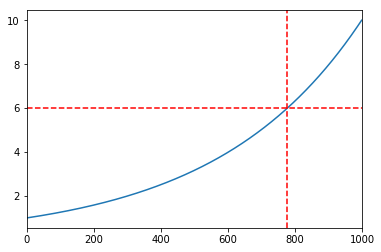

In [8]:
ax = df.y1.plot()
ax.axhline(6, color="red", linestyle="--")
ax.axvline(775, color="red", linestyle="--")

### 1.2 Customize axes on the input

Pandas plot function also takes Axes argument on the input. 
This enables us to customize plots to our liking.
In the example below, we create a two-by-two grid with different types of plots.

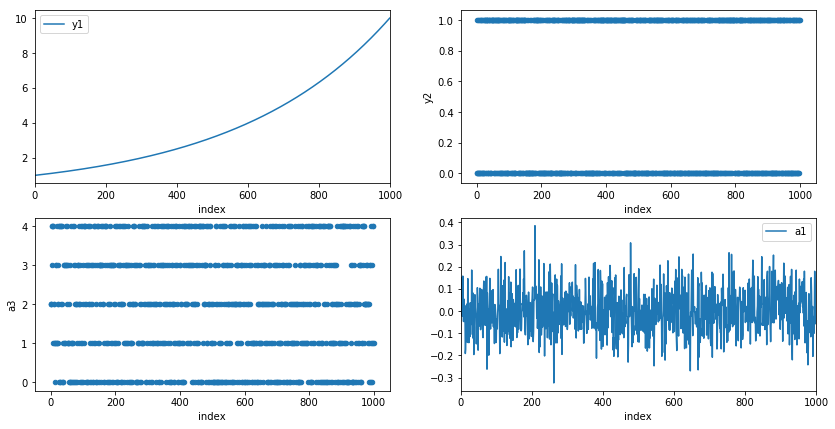

In [9]:
fig, ax = mpl.pyplot.subplots(2, 2, figsize=(14,7))
df.plot(x="index", y="y1", ax=ax[0, 0])
df.plot.scatter(x="index", y="y2", ax=ax[0, 1])
df.plot.scatter(x="index", y="a3", ax=ax[1, 0])
df.plot(x="index", y="a1", ax=ax[1, 1])

## 2. Histograms

A histogram is an accurate representation of the distribution of numerical data. 
It is an estimate of the probability distribution of a continuous variable and was first introduced by Karl Pearson[[1]](https://en.wikipedia.org/wiki/Histogram).

### 2.1 Stacked Histograms

Pandas enables us to compare distributions of multiple variables on a single histogram with a single function call.

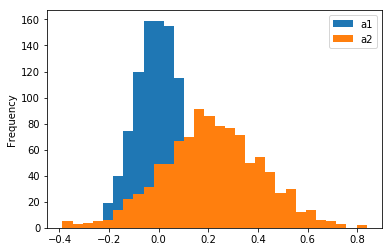

In [10]:
df[["a1", "a2"]].plot(bins=30, kind="hist")

To create two separate plots, we set `subplots=True`.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x107b9be80>,
      dtype=object)

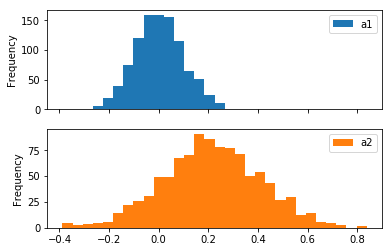

In [11]:
df[["a1", "a2"]].plot(bins=30, kind="hist", subplots=True)

### 2.2 Probability Density Function

A Probability density function (PDF) is a function whose value at any given sample in the set of possible values can be interpreted as a relative likelihood that the value of the random variable would equal that sample [[2]](https://en.wikipedia.org/wiki/Probability_density_function).
In other words, the value of the PDF at two different samples can be used to infer, in any particular draw of the random variable, how much more likely it is that the random variable would equal one sample compared to the other sample.

Note that in pandas, there is a `density=1` argument that we can pass to `hist` function, but with it, we don't get a PDF, because the y-axis is not on the scale from 0 to 1 as can be seen on the plot below.
The reason for this is explained in [numpy documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html):  "Note that the sum of the histogram values will not be equal to 1 unless bins of unity width are chosen; it is not a probability mass function.".

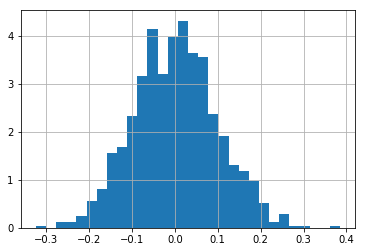

In [12]:
df.a1.hist(bins=30, density=1)

To calculate a PDF for a variable, we use the `weights` argument of a `hist` function.
We can observe on the plot below, that the maximum value of the y-axis is less than 1.

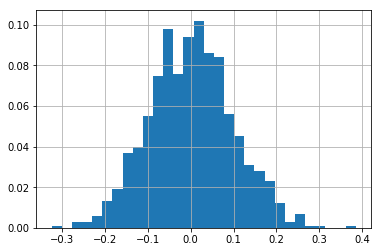

In [13]:
weights = pd.np.ones_like(df.a1.values) / len(df.a1.values)
df.a1.hist(bins=30, weights=weights)

### 2.3 Cumulative Distribution Function

A cumulative histogram is a mapping that counts the cumulative number of observations in all of the bins up to the specified bin.

Let's make a cumulative histogram for a1 column.
We can observe on the plot below that there are approximately 500 data points where the x is smaller or equal to 0.0.

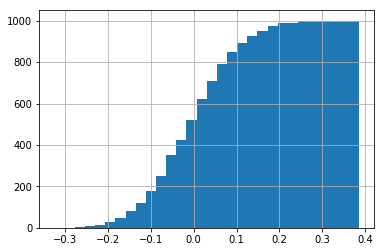

In [14]:
df.a1.hist(bins=30, cumulative=True)

A normalized cumulative histogram is what we call Cumulative distribution function (CDF) in statistics.
The CDF is the probability that the variable takes a value less than or equal to x.
In the example below, the probability that x <= 0.0 is 0.5 and x <= 0.2 is cca. 0.98.
Note that `densitiy=1` argument works as expected with cumulative histograms.

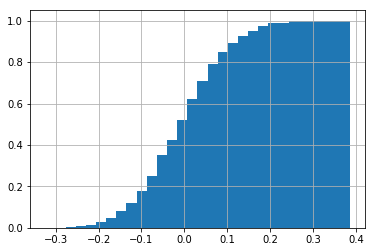

In [15]:
df.a1.hist(bins=30, cumulative=True, density=1)

## 3. Plots for separate groups

Pandas enables us to visualize data separated by the value of the specified column.
Separating data by certain columns and observing differences in distributions is a common step in Exploratory Data Analysis.
Let's separate distributions of a1 and a2 columns by the y2 column and plot histograms.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1080924e0>,
      dtype=object)

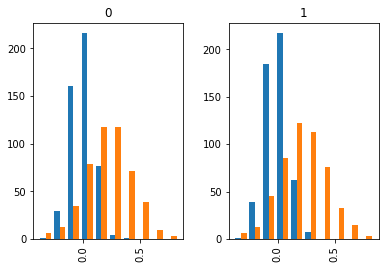

In [16]:
df[['a1', 'a2']].hist(by=df.y2)

There is not much difference between separated distributions as the data was randomly generated. 

We can do the same for the line plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1081a77b8>,
      dtype=object)

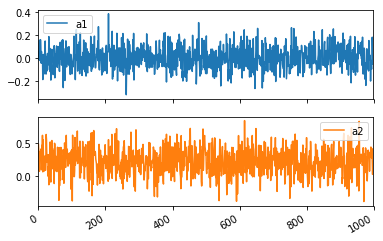

In [17]:
df[['a1', 'a2']].plot(by=df.y2, subplots=True)

## 4. Dummy variables

Some Machine Learning algorithms don't work with multivariate attributes, like a3 column in our example.
a3 column has 5 distinct values (0, 1, 2, 3, 4 and 5). 
To transform a multivariate attribute to multiple binary attributes, we can binarize the column, so that we get 5 attributes with 0 and 1 values.

Let's look at the example below. 
The first three rows of a3 column have value 2. 
So a3_2 attribute has the first three rows marked with 1 and all other attributes are 0.
The fourth row in a3 has a value 3, so a3_3 is 1 and all others are 0, etc.

In [18]:
df.a3.head()

0    2
1    2
2    2
3    3
4    4
Name: a3, dtype: int64

In [19]:
df_a4_dummy = pd.get_dummies(df.a3, prefix='a3_')
df_a4_dummy.head()

,a3__0,a3__1,a3__2,a3__3,a3__4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


`get_dummies` function also enables us to drop the first column, so that we don't store redundant information.
Eg. when a3_1, a3_2, a3_3, a3_4 are all 0 we can assume that a3_0 should be 1 and we don't need to store it.

In [20]:
pd.get_dummies(df.a3, prefix='a3_', drop_first=True).head()

,a3__1,a3__2,a3__3,a3__4
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1


Now that we have binarized the a3 column, let's remove it from the DataFrame and add binarized attributes to it.

In [21]:
df = df.drop('a3', axis=1)

In [22]:
df = pd.concat([df, df_a4_dummy], axis=1)
df.shape

(1000, 10)

In [23]:
df.head()

,index,a1,a2,y1,y2,a3__0,a3__1,a3__2,a3__3,a3__4
0,0,0.049671,0.479871,1.000000,1,0,0,1,0,0
1,1,-0.013826,0.384927,1.002308,0,0,0,1,0,0
2,2,0.064769,0.211926,1.004620,0,0,0,1,0,0
3,3,0.152303,0.070613,1.006939,0,0,0,0,1,0
4,4,-0.023415,0.339645,1.009262,0,0,0,0,0,1


## 5. Fitting lines

Sometimes we would like to compare a certain distribution with a linear line.
Eg. To determine if monthly sales growth is higher than linear.
When we observe that our data is linear, we can predict future values.

Pandas (with the help of numpy) enables us to fit a linear line to our data.
This is a Linear Regression algorithm in Machine Learning, which tries to make the vertical distance between the line and the data points as small as possible. 
This is called “fitting the line to the data.” 

The plot below shows the y1 column. 
Let's draw a linear line that closely matches data points of the y1 column.

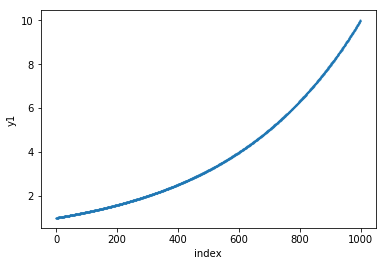

In [24]:
df.plot.scatter(x='index', y='y1', s=1)

The code below calculates the least-squares solution to a linear equation. 
The output of the function that we are interested in is the least-squares solution.

In [25]:
df['ones'] = pd.np.ones(len(df))
m, c = pd.np.linalg.lstsq(df[['index', 'ones']], df['y1'], rcond=None)[0]

Equation for a line is `y = m * x + c`. 
Let's use the equation and calculate the values for the line `y` that closely fits the `y1` line.

In [26]:
df['y'] = df['index'].apply(lambda x: x * m + c)

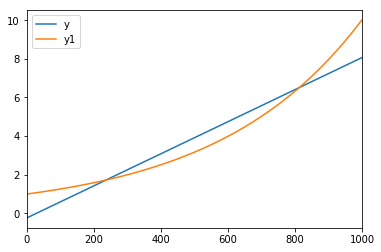

In [27]:
df[['y', 'y1']].plot()

## Conclusion

In this part, I've shown a few tricks that help me to be more productive when working on Exploratory Data Analysis.

Have you learned any way to make visualizations with pandas? Let me know in the comments below.